# Introduction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Exploratory Data Analysis

In [3]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


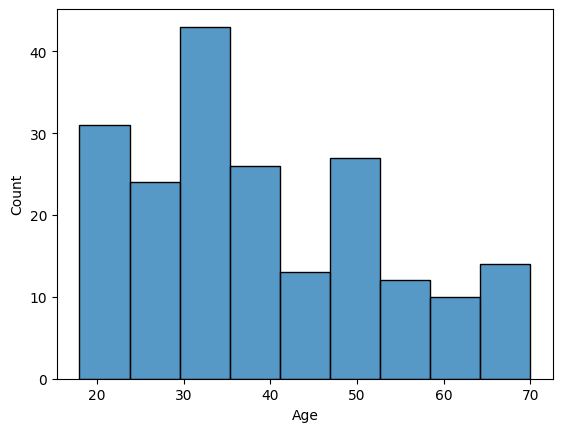

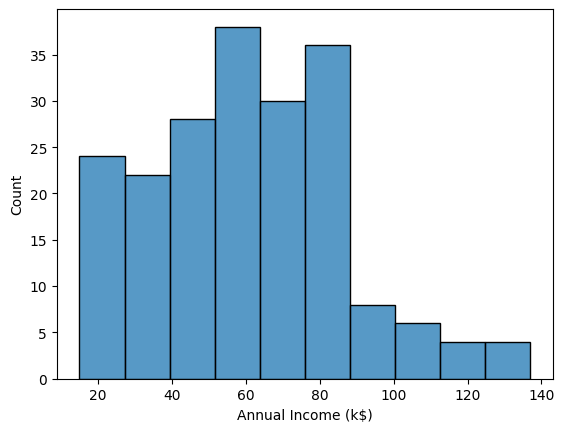

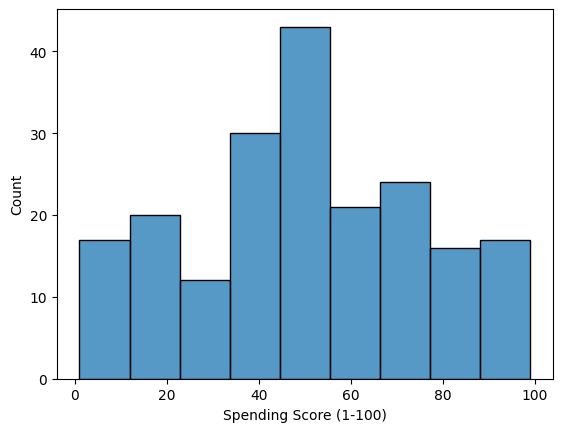

In [5]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for column in columns:
    plt.figure()
    sns.histplot(df[column])

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


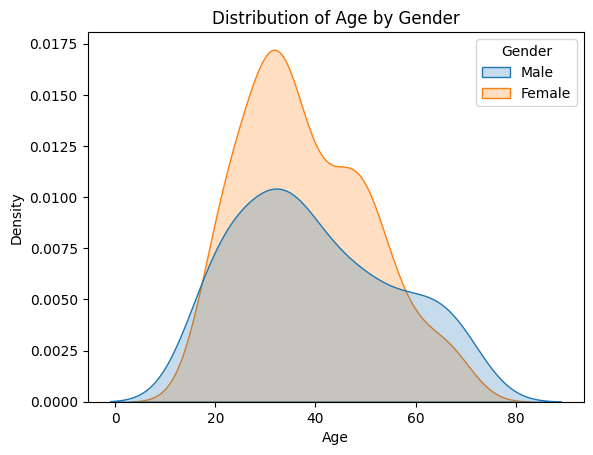

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


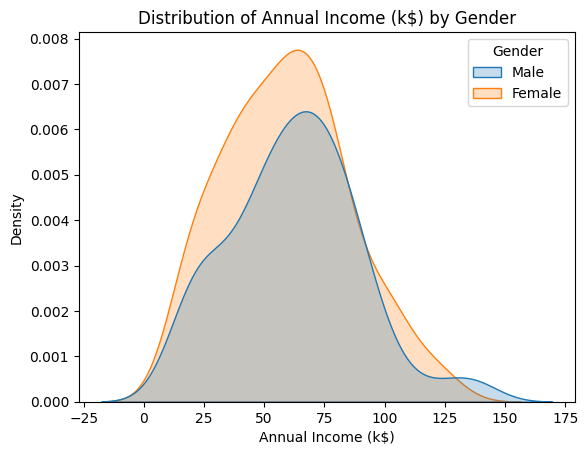

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


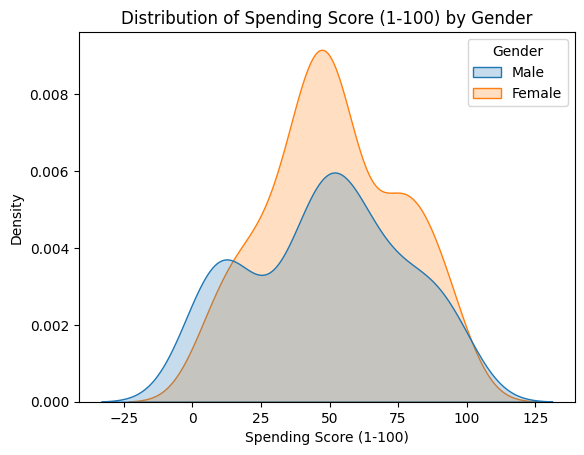

In [6]:
for column in columns:
    plt.figure()
    sns.kdeplot(data=df, x=column, hue='Gender', fill=True)
    plt.title(f'Distribution of {column} by Gender')
    plt.show()

In the distribution of age by gender, we see that there is a much higher frequency for females ages 20-40 than males. However, the other two graphs look very similar to each other. 

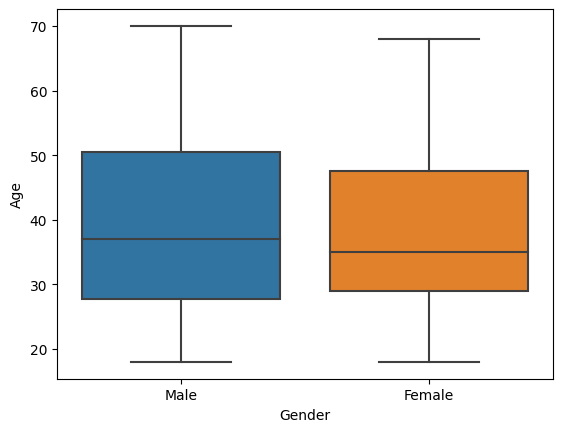

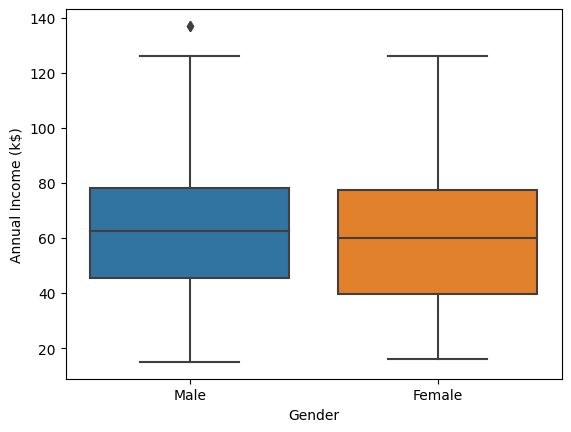

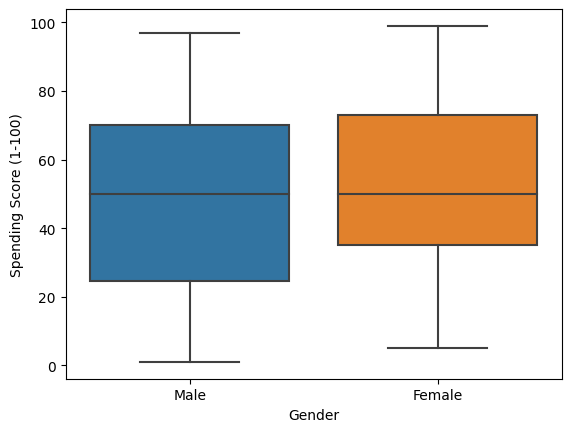

In [7]:
for column in columns:
    plt.figure()
    sns.boxplot(data=df, x='Gender', y=df[column])

**Age and Gender Boxplot**

- Median is a little bit higher for the male than the female, and the interquartile range is also larger.

**Annual Income and Gender Boxplot**

- The outlier, which was visible in the longer tail of the kde, is shown. The medians of the two plots are slightly off from one another.

**Spending Score and Gender Boxplot**

- The medians for the two graphs look to be the same with the interquartile range for the Male boxplot being larger than the Female one.


In [8]:
df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

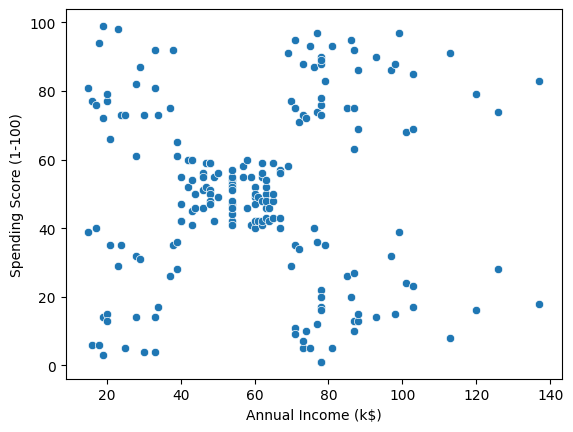

In [9]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)')

Scatterplot of these two variables gives us a bit of visual insight into the clusters present.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


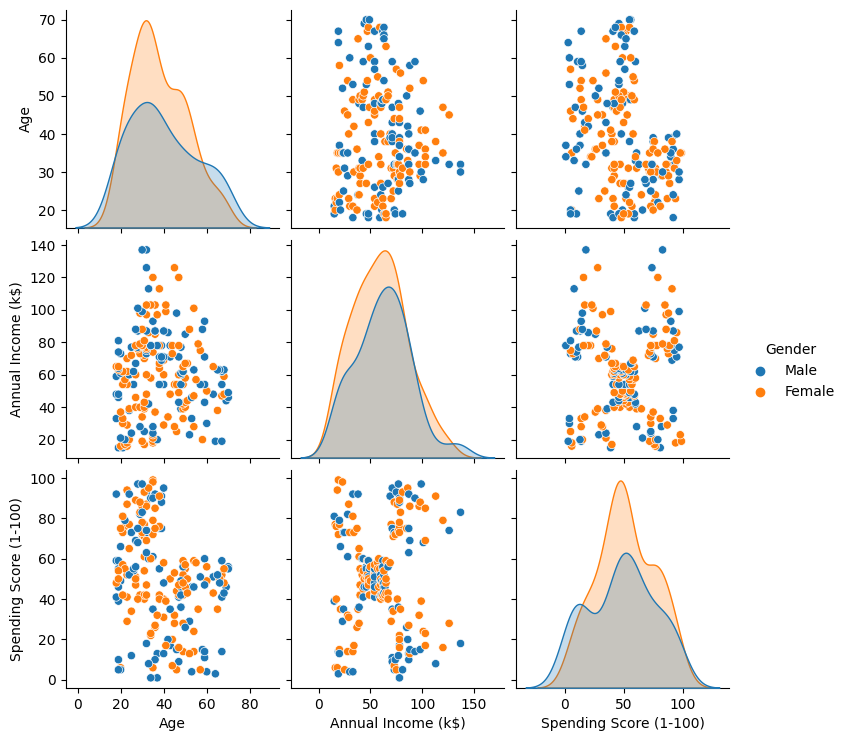

In [10]:
df2 = df.drop('CustomerID', axis=1)
sns.pairplot(df2, hue='Gender')

In [11]:
df2.groupby('Gender')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


<Axes: >

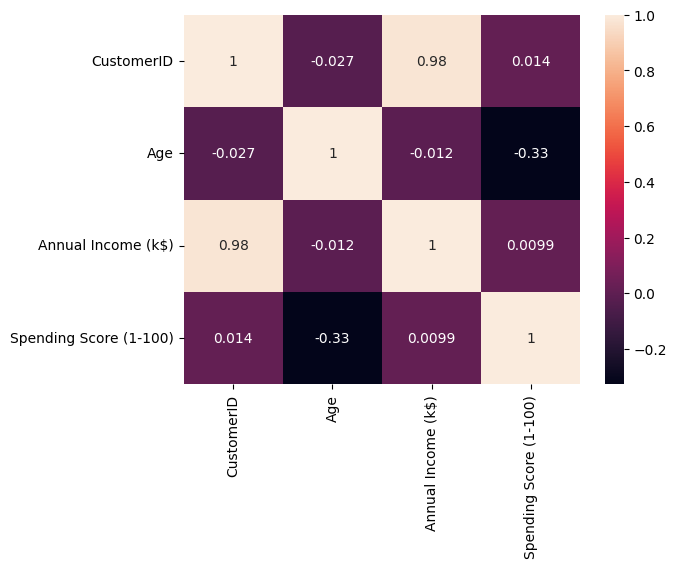

In [12]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

## Model Creation

### Univariate Clustering

In [13]:
clustering1 = KMeans(n_clusters=3)
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [14]:
clustering1.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [15]:
df['Income Cluster'] = clustering1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


In [16]:
df['Income Cluster'].value_counts()

Income Cluster
0    86
2    58
1    56
Name: count, dtype: int64

In [17]:
clustering1.inertia_

25640.457784396836

In [18]:
inertia_scores = []
for i in range(1, 11):
    clustering = KMeans(n_clusters=i)
    clustering.fit(df[['Annual Income (k$)']])
    inertia_scores.append(clustering.inertia_)
inertia_scores

[137277.28000000003,
 48660.88888888889,
 25341.285871863223,
 15460.429512270888,
 8481.496190476191,
 5503.407059314954,
 4159.944391116132,
 2977.242424242425,
 2370.151845522898,
 2080.177128427128]

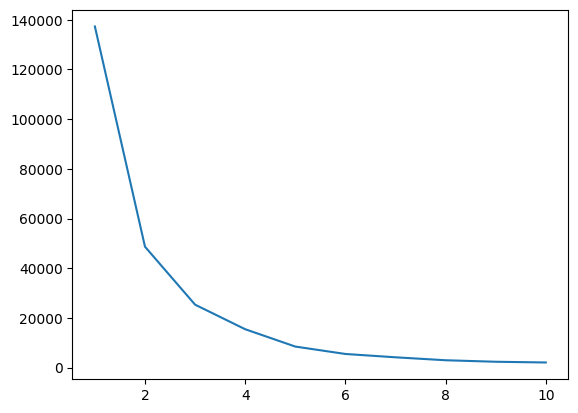

In [19]:
plt.plot(range(1, 11), inertia_scores)

From the elbow method, we can see that the ideal number of clusters should be three.

In [20]:
df.groupby('Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,41.279070,60.906977,50.337209
1,36.910714,92.142857,50.517857
2,37.120690,29.551724,49.689655


Age and Spending score are pretty standard with differentiation within Annual Income

### Bivariate Clustering

In [21]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
clustering2.labels_
df['Income Spending Cluster'] = clustering2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Income Spending Cluster
0,1,Male,19,15,39,2,4
1,2,Male,21,15,81,2,1
2,3,Female,20,16,6,2,4
3,4,Female,23,16,77,2,1
4,5,Female,31,17,40,2,4


In [22]:
df['Income Spending Cluster'].value_counts()

Income Spending Cluster
0    81
2    39
3    35
4    23
1    22
Name: count, dtype: int64

In [23]:
inertia_scores = []
for i in range(1, 11):
    clustering = KMeans(n_clusters=i)
    clustering.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_scores.append(clustering.inertia_)
inertia_scores

[269981.28,
 181665.82312925172,
 106348.37306211119,
 73880.64496247195,
 66465.14810226465,
 37442.24745037571,
 35758.86857924684,
 30688.82955233173,
 24567.02111222111,
 20216.05543410078]

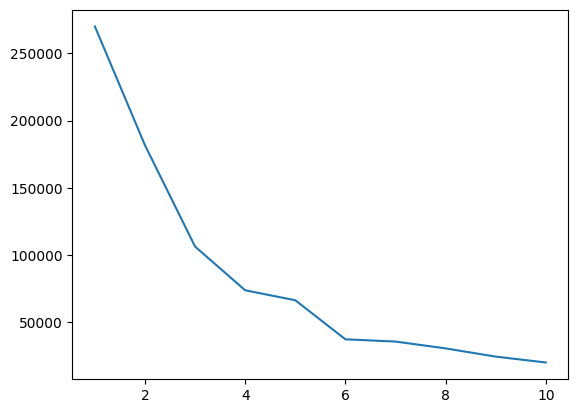

In [24]:
plt.plot(range(1, 11), inertia_scores)

From the Elbow Method, we can see that the number of clusters that we should choose is 5.

In [25]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x', 'y']
centers    

,x,y
0,55.296296,49.518519
1,25.727273,79.363636
2,86.538462,82.128205
3,88.200000,17.114286
4,26.304348,20.913043


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

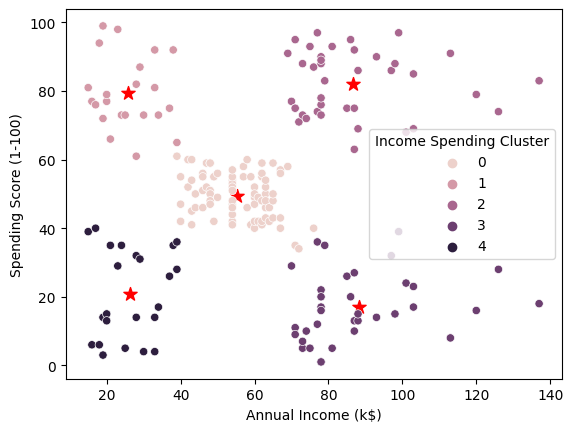

In [26]:
plt.figure()
plt.scatter(x=centers['x'], y=centers['y'], c='red', s=100, marker='*')
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Income Spending Cluster')

In [27]:
pd.crosstab(df['Income Spending Cluster'], df['Gender'], normalize='index')

Gender,Female,Male
Income Spending Cluster,,
0,0.592593,0.407407
1,0.590909,0.409091
2,0.538462,0.461538
3,0.457143,0.542857
4,0.608696,0.391304


From this crosstab, we are able to see that Cluster 1 can be identified as our target cluster because there is both a high spending score as well as a high annual income associated with customers in this cluster. This is an important insight for businesses and marketing campaigns, so that they can target and market towards customers within this cluster to more effectively increase sales. 

In [28]:
df.groupby('Income Spending Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Spending Cluster,,,
0,42.716049,55.296296,49.518519
1,25.272727,25.727273,79.363636
2,32.692308,86.538462,82.128205
3,41.114286,88.200000,17.114286
4,45.217391,26.304348,20.913043


More specifically from this groupby table, we can see that customers within cluster 1 have an average age of about 32, an average annual income of about 86,000, and an average spending score of about 82.

### Multivariate Clustering

In [29]:
scale = StandardScaler()

In [30]:
df3 = pd.get_dummies(df, drop_first=True)
df3.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Income Spending Cluster,Gender_Male
0,1,19,15,39,2,4,True
1,2,21,15,81,2,1,True
2,3,20,16,6,2,4,False
3,4,23,16,77,2,1,False
4,5,31,17,40,2,4,False


In [31]:
df3 = df3[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]
df3['Gender_Male'] = df3['Gender_Male'].astype('int')
df3.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [32]:
df3 = pd.DataFrame(scale.fit_transform(df3))

In [33]:
df3.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


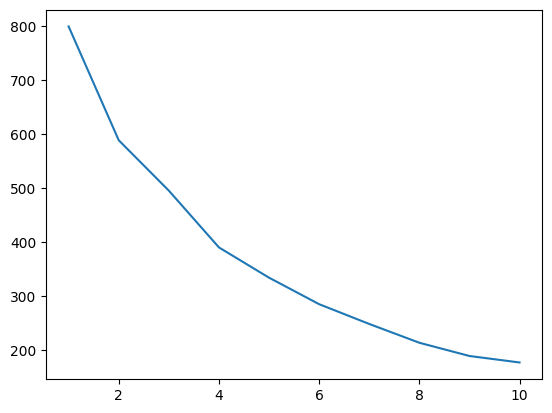

In [34]:
inertia_scores = []
for i in range(1, 11):
    clustering = KMeans(n_clusters=i)
    clustering.fit(df3)
    inertia_scores.append(clustering.inertia_)
plt.plot(range(1, 11), inertia_scores)

From this plot, we can see that the elbow starts forming around 4.

In [35]:
clustering3 = KMeans(n_clusters=4)
clustering3.fit(df3)
df['Multivariate Cluster'] = clustering3.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Income Spending Cluster,Multivariate Cluster
0,1,Male,19,15,39,2,4,0
1,2,Male,21,15,81,2,1,0
2,3,Female,20,16,6,2,4,2
3,4,Female,23,16,77,2,1,2
4,5,Female,31,17,40,2,4,2


In [36]:
df['Multivariate Cluster'].value_counts()

Multivariate Cluster
2    76
0    49
3    41
1    34
Name: count, dtype: int64

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

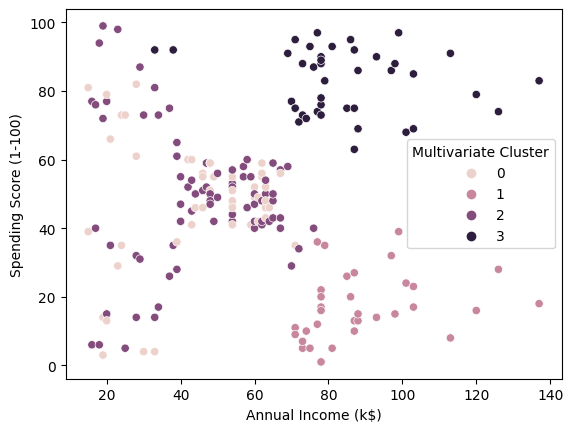

In [37]:
plt.figure()
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Multivariate Cluster')

In [38]:
df.groupby('Multivariate Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Multivariate Cluster,,,
0,43.163265,45.000000,47.979592
1,41.647059,88.735294,16.764706
2,38.447368,45.315789,49.105263
3,32.121951,84.048780,82.609756


Once again from this multivariate cluster we see that the ideal cluster is in the top right corner when both spending score and annual income are high.